In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Configuration
%matplotlib inline
plt.style.use('fivethirtyeight')

In [3]:
athletes = pd.read_excel('data/Athletes.xlsx')
coaches = pd.read_excel('data/Coaches.xlsx')
entries_gender = pd.read_excel('data/EntriesGender.xlsx')
medals = pd.read_excel('data/Medals.xlsx')
teams = pd.read_excel('data/Teams.xlsx')

c:\Users\sauli\Downloads\Web-dev\rocking-data-challenge\sql-challenge\challenge-env\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [4]:
athletes.head()

,Name,NOC,Discipline
0,AALERUD Katrine,Norway,Cycling Road
1,ABAD Nestor,Spain,Artistic Gymnastics
2,ABAGNALE Giovanni,Italy,Rowing
3,ABALDE Alberto,Spain,Basketball
4,ABALDE Tamara,Spain,Basketball


In [5]:
# Participants in each Diciplines by Countries
athletes_country = athletes.groupby('NOC')['NOC']\
	.count()\
	.reset_index(name='Athletes')\
	.sort_values(['Athletes'], ascending=[False])\
	.head(20)

athletes_country

,NOC,Athletes
195,United States of America,615
94,Japan,586
10,Australia,470
144,People's Republic of China,401
71,Germany,400
67,France,377
33,Canada,368
73,Great Britain,366
92,Italy,356
174,Spain,324


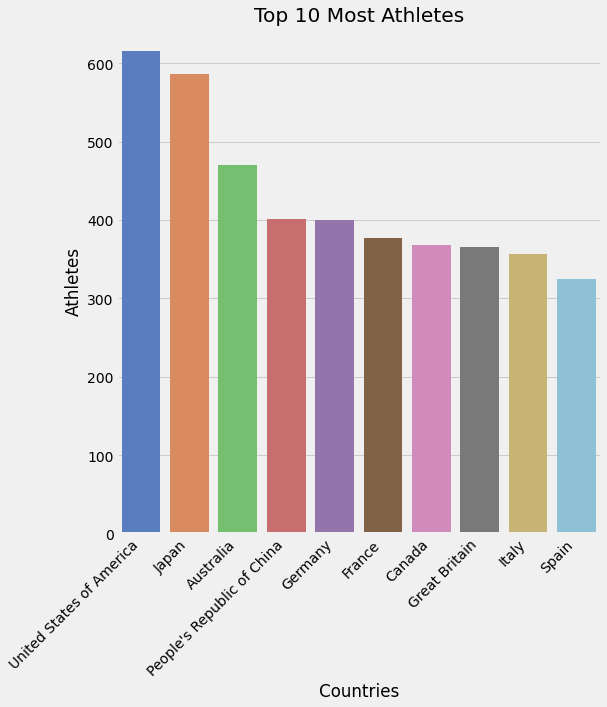

In [6]:
g = sns.catplot(x="NOC", y="Athletes", data=athletes_country.head(10),
                height=8, kind="bar", palette="muted", legend_out=True)
g.set_xlabels("Countries")
g.set_ylabels("Athletes")
plt.title('Top 10 Most Athletes')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [7]:
medals.head()

,Rank,Team/NOC,Gold,Silver,Bronze,Total,Rank by Total
0,1,United States of America,7,3,4,14,2
1,2,Japan,7,1,3,11,3
2,3,People's Republic of China,6,3,6,15,1
3,4,Great Britain,3,2,1,6,7
4,5,Republic of Korea,3,0,4,7,6


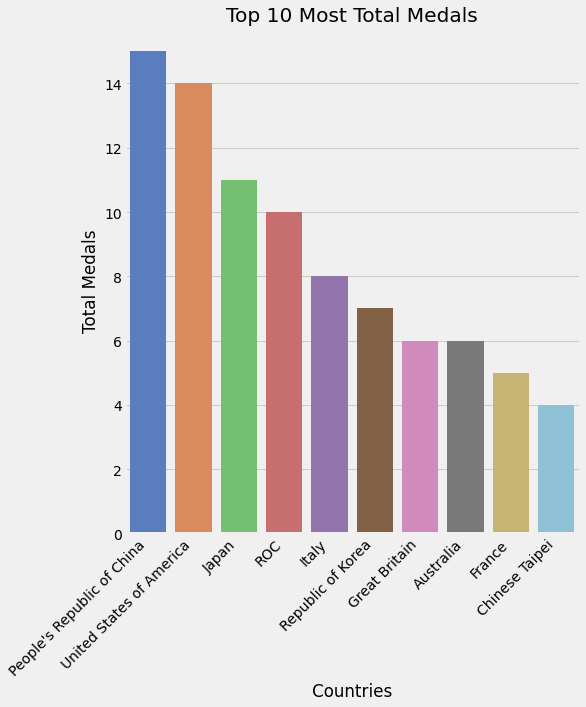

In [8]:

g = sns.catplot(x="Team/NOC", y="Total", data=medals.sort_values('Total',ascending=False).head(10),
                height=8, kind="bar", palette="muted", legend_out=True)
g.set_xlabels("Countries")
g.set_ylabels("Total Medals")
plt.title('Top 10 Most Total Medals')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [9]:
entries_gender.head()

,Discipline,Female,Male,Total
0,3x3 Basketball,32,32,64
1,Archery,64,64,128
2,Artistic Gymnastics,98,98,196
3,Artistic Swimming,105,0,105
4,Athletics,969,1072,2041


In [10]:
entries_gender['M/F Ratio'] = entries_gender.Male/entries_gender.Female
entries_gender.sort_values(['M/F Ratio'], ascending=False)


,Discipline,Female,Male,Total,M/F Ratio
45,Wrestling,96,193,289,2.010417
15,Cycling Road,70,131,201,1.871429
9,Boxing,102,187,289,1.833333
18,Equestrian,73,125,198,1.712329
6,Baseball/Softball,90,144,234,1.600000
20,Football,264,344,608,1.303030
43,Water Polo,122,146,268,1.196721
36,Swimming,361,418,779,1.157895
4,Athletics,969,1072,2041,1.106295
16,Cycling Track,90,99,189,1.100000


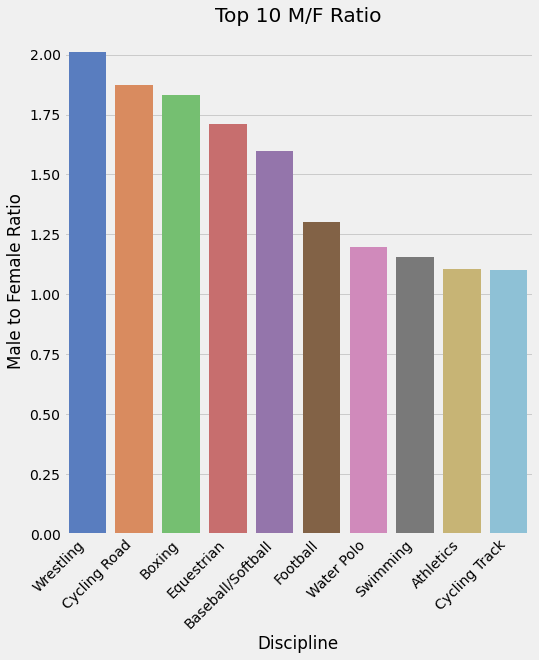

In [11]:
g = sns.catplot(x="Discipline", y="M/F Ratio", data=entries_gender.sort_values(['M/F Ratio'], ascending=False).head(10),
                height=8, kind="bar", palette="muted", legend_out=True)
g.set_xlabels("Discipline")
g.set_ylabels("Male to Female Ratio")
plt.title('Top 10 M/F Ratio')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

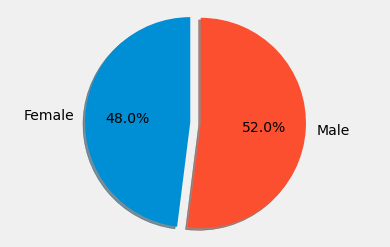

In [12]:
labels = ['Female' , 'Male']
data = [entries_gender.Female.sum(), entries_gender.Male.sum()]
explode = (0, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(data, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



In [13]:
# Participants in each Diciplines by Countries
athletes_discipline = athletes.groupby('Discipline')['Discipline']\
	.count()\
	.reset_index(name='Athletes')\
	.sort_values(['Athletes'], ascending=[False])\
	.head(20)

athletes_discipline

,Discipline,Athletes
4,Athletics,2068
36,Swimming,743
20,Football,567
29,Rowing,496
23,Hockey,406
24,Judo,373
22,Handball,343
32,Shooting,342
31,Sailing,336
30,Rugby Sevens,283


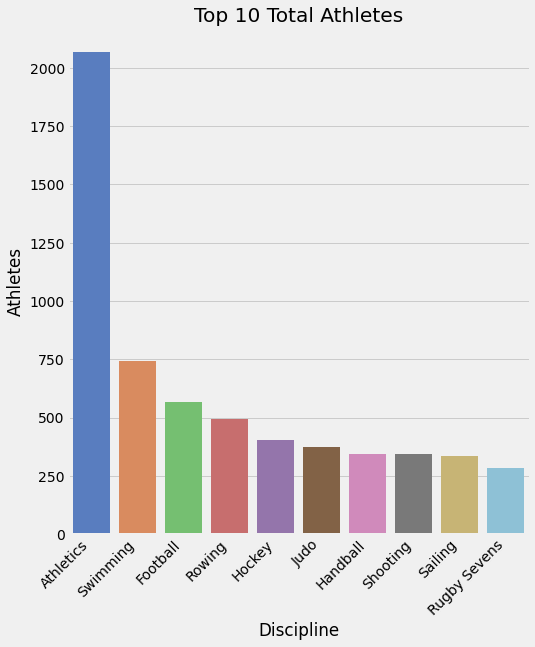

In [14]:
g = sns.catplot(x="Discipline", y="Athletes", data=athletes_discipline.head(10),
                height=8, kind="bar", palette="muted", legend_out=True)
g.set_xlabels("Discipline")
g.set_ylabels("Athletes")
plt.title('Top 10 Total Athletes')
plt.xticks(rotation = 45, ha = 'right')
plt.show()

In [15]:
import requests


In [16]:
request_chromecast = requests.get(
    "https://api.mercadolibre.com/sites/MLA/search?q=chromecast&limit=50#json"
)
